# Analysis On Groceries

## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Importing Packages](#section2)<br>
3. [Loading Data](#section3)<br>
  - 3.1 [Importing Dataset](#section301)<br>
  - 3.2 [Name Column](#section302)<br>
  - 3.3 [Identifying Missing Values](#section303)<br>
  - 3.4 [Identify Rows and Columns](#section304)<br>
  - 3.5 [Identify Unique Item Values](#section305)<br>  
4. [Exploratory Data Analysis](#section4)<br>
  - 4.1 [Analysis based on Sales](#section401)<br>
5. [Applying Apriori Algorithm](#section5)<br>
  - 5.1 [Transform Data](#section501)<br>
  - 5.2 [Applying Association Rules](#section502)<br>
  - 5.3 [Confidence Sorting](#section503)<br>
  - 5.4 [Visualizing Association](#section504)<br>    
6. [Conclusion](#section6)<br>

<a id=section1></a>
## 1. Problem Statement

One of the big **super market** in the city given their sales of **groceries** data to find useful outcome. The owner of the super market want to know that **most frequent item on sales**. We are trying to predict, what other items people buy along with most frequent items. This may **boost the sales**.

<a id=section2></a>
## 2. Importing Packages

In [1]:
import pandas as pd
import numpy as np
import warnings

import matplotlib.pyplot as plt
import seaborn as sns

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import networkx as nx

%matplotlib inline
warnings.filterwarnings('ignore')

<a id=section3></a>
## 3. Loading Data

<a id=section301></a>
### 3.1 Importing Dataset

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-4/master/Projects/groceries.csv',sep='\t',header=None)
df.head()

,0
0,"citrus fruit,semi-finished bread,margarine,rea..."
1,"tropical fruit,yogurt,coffee"
2,whole milk
3,"pip fruit,yogurt,cream cheese ,meat spreads"
4,"other vegetables,whole milk,condensed milk,lon..."


**Observations**
- **No** column name given in data set.

<a id=section302></a>
### 3.2 Name Column

In [3]:
df.columns = ['Items']
df.head()

,Items
0,"citrus fruit,semi-finished bread,margarine,rea..."
1,"tropical fruit,yogurt,coffee"
2,whole milk
3,"pip fruit,yogurt,cream cheese ,meat spreads"
4,"other vegetables,whole milk,condensed milk,lon..."


**Observations**
- **Items** is the column name assigned in data set.

<a id=section303></a>
### 3.3 Identify Missing Values

In [4]:
df.isnull().sum()

Items    0
dtype: int64

**Observations**
- There is **no missing values**

<a id=section304></a>
### 3.4 Identify Rows and Columns

In [5]:
df.shape

(9835, 1)

**Observations**
- There are **9835 transactions** and **1 column** value of **Items**.

<a id=section305></a>
### 3.5 Identify Unique Item Values

In [6]:
df.Items.value_counts()

canned beer                                                                                                                                                                                                                260
soda                                                                                                                                                                                                                       156
whole milk                                                                                                                                                                                                                 121
bottled beer                                                                                                                                                                                                               120
rolls/buns                                                                                                  

**Observations**
- The list shows that unique items sale count of both individually or combinedly

<a id=section4></a>
## 4. Exploratory Data Analysis

<a id=section401></a>
### 4.1 Analysis based on Sales

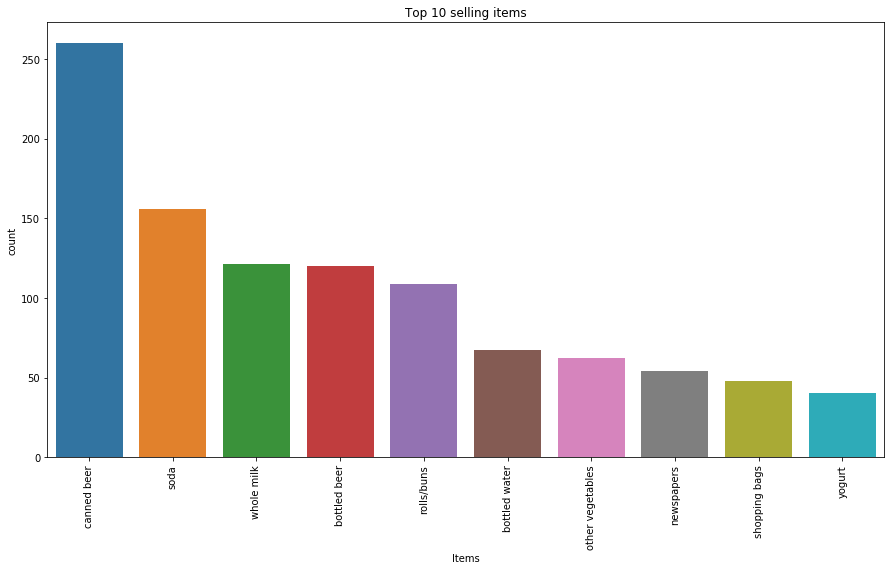

In [7]:
fig  =  plt.figure(figsize = (15,8))
sns.countplot(x  =  'Items', data  =  df, order  =  df['Items'].value_counts().iloc[:10].index)
plt.xticks(rotation = 90)
plt.title('Top 10 selling items')
plt.show()

**Observations**
- The graph shows top 10 selling items in super market.
- Most sold single item is **canned beer** with **260** units.

<a id=section5></a>
## 5. Applying Apriori Algorithm

<a id=section501></a>
### 5.1 Transform Data

-  Transfrom the data to make items as columns and each transaction as a row and count same Items bought in one transaction but fill other cloumns of the row with 0 to represent item which are not bought.

In [8]:
df_encoded = df['Items'].str.get_dummies(',')
df_encoded.head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [9]:
def encode_units(x):
    if x <=  0:
        return 0
    if x >=  1:
        return 1
df_encoded = df_encoded.applymap(encode_units)

<a id=section502></a>
### 5.2 Applying Association Rules

- Association rules is to determine the optimal thresholds for **support and confidence**.
- Support is an indication of how frequently the itemset appears in the dataset.
- Confidence is an indication of how often the rule has been found to be true.
- **min_support** as **0.01** to be the threshhold

In [10]:
frequent_items  =  apriori(df_encoded, min_support = 0.01, use_colnames = True)

In [11]:
rules  =  association_rules(frequent_items, metric = "lift", min_threshold = 1)
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(other vegetables),(beef),0.193493,0.052466,0.019725,0.101944,1.943066,0.009574,1.055095
1,(beef),(other vegetables),0.052466,0.193493,0.019725,0.375969,1.943066,0.009574,1.292416
2,(beef),(rolls/buns),0.052466,0.183935,0.013625,0.259690,1.411858,0.003975,1.102329
3,(rolls/buns),(beef),0.183935,0.052466,0.013625,0.074074,1.411858,0.003975,1.023337
4,(beef),(root vegetables),0.052466,0.108998,0.017387,0.331395,3.040367,0.011668,1.332628
5,(root vegetables),(beef),0.108998,0.052466,0.017387,0.159515,3.040367,0.011668,1.127366
6,(beef),(whole milk),0.052466,0.255516,0.021251,0.405039,1.585180,0.007845,1.251315
7,(whole milk),(beef),0.255516,0.052466,0.021251,0.083168,1.585180,0.007845,1.033487
8,(beef),(yogurt),0.052466,0.139502,0.011693,0.222868,1.597601,0.004374,1.107275
9,(yogurt),(beef),0.139502,0.052466,0.011693,0.083819,1.597601,0.004374,1.034222


<a id=section503></a>
### 5.3 Confidence Sorting

- confidence for sorting purpose and to find the most important relationships.

In [12]:
rules.sort_values('confidence', ascending  =  False, inplace  =  True)
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
420,"(root vegetables, citrus fruit)",(other vegetables),0.017692,0.193493,0.010371,0.586207,3.029608,0.006948,1.949059
492,"(root vegetables, tropical fruit)",(other vegetables),0.021047,0.193493,0.012303,0.584541,3.020999,0.008231,1.941244
437,"(yogurt, curd)",(whole milk),0.017285,0.255516,0.010066,0.582353,2.279125,0.005649,1.782567
413,"(other vegetables, butter)",(whole milk),0.020031,0.255516,0.011490,0.573604,2.244885,0.006371,1.745992
570,"(root vegetables, tropical fruit)",(whole milk),0.021047,0.255516,0.011998,0.570048,2.230969,0.006620,1.731553
575,"(yogurt, root vegetables)",(whole milk),0.025826,0.255516,0.014540,0.562992,2.203354,0.007941,1.703594
442,"(domestic eggs, other vegetables)",(whole milk),0.022267,0.255516,0.012303,0.552511,2.162336,0.006613,1.663694
592,"(whipped/sour cream, yogurt)",(whole milk),0.020742,0.255516,0.010880,0.524510,2.052747,0.005580,1.565719
551,"(rolls/buns, root vegetables)",(whole milk),0.024301,0.255516,0.012710,0.523013,2.046888,0.006500,1.560804
460,"(other vegetables, pip fruit)",(whole milk),0.026131,0.255516,0.013523,0.517510,2.025351,0.006846,1.543003


**Observations**
- To draw inference explore the first rule we can see that **root vegetables, citrus fruit** and **other vegetables** are commonly bought together. This makes sense since people who purchase **root vegetables** and **citrus fruit** would like to buy **other vegetables** with it.
- The **support** value for the this rule is **0.010371**. This number is calculated by dividing the number of transactions containing **root vegetables, citrus fruit** divided by total number of transactions.
- The **confidence** level for the rule is **0.586207** which shows that out of all the transactions that contain **root vegetables and citrus fruit**, 58.62% of the transactions also contain **other vegetables**.
- Finally, the **lift** of **3.029608** tells us that **other vegetables** is **3.029608** times more likely to be bought by the customers who buy **root vegetables, citrus fruit** compared to the default likelihood of the sale of **other vegetables**.

In [13]:
rules = rules[rules['confidence']>= 0.57]
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
420,"(root vegetables, citrus fruit)",(other vegetables),0.017692,0.193493,0.010371,0.586207,3.029608,0.006948,1.949059
492,"(root vegetables, tropical fruit)",(other vegetables),0.021047,0.193493,0.012303,0.584541,3.020999,0.008231,1.941244
437,"(yogurt, curd)",(whole milk),0.017285,0.255516,0.010066,0.582353,2.279125,0.005649,1.782567
413,"(other vegetables, butter)",(whole milk),0.020031,0.255516,0.011490,0.573604,2.244885,0.006371,1.745992
570,"(root vegetables, tropical fruit)",(whole milk),0.021047,0.255516,0.011998,0.570048,2.230969,0.006620,1.731553


**Observations**
- **58.23%** of the customers who bought **curd, yogurt** also bought **whole milk**.
- **58.45%** of the customers who bought **root vegetables, tropical fruit** also bought **other vegetables**.
- **58.62%** of the customers who bought **root vegetables, citrus fruit** also bought **other vegetables**.

<a id=section504></a>
### 5.4 Visualizing Association

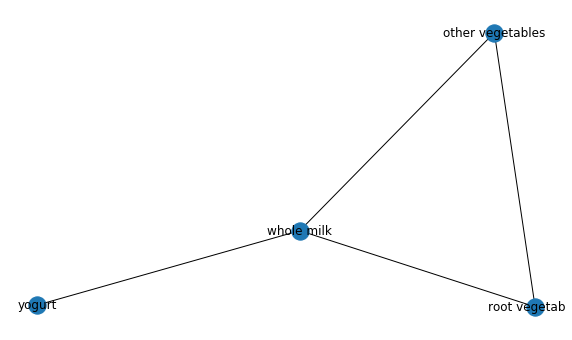

In [14]:
rules.antecedents  =  rules.antecedents.apply(lambda x: next(iter(x)))
rules.consequents  =  rules.consequents.apply(lambda x: next(iter(x)))
fig, ax = plt.subplots(figsize = (10,6))
GA = nx.from_pandas_edgelist(rules,source = 'antecedents',target = 'consequents')
nx.draw(GA,with_labels = True)

<a id=section6></a>
## 6. Conclusion

- **Whole milk** is the bestseller of this super market and it shows association with 3 items- **curd, root vegetables and other vegetables**. There are a couple of strategies that the super market can adopt to increase its sales considering the association we have seen between **whole milk** and its **3 partners**.